In [1]:
import matplotlib.pyplot as plt

from scipy.special import logit,expit

import tree_braider as trbr
import tree_reader as trr
import lumberjack

import numpy as np

In [2]:
r1 = {}

r1['feature'] = '0'
r1['split'] = 1
r1['features'] = ['1']
r1['samples'] = ['0','1','2']
r1['medians'] = [0]
r1['dispersions'] = [0]
r1['local_gains'] = None
r1['absolute_gains'] = None
r1['children'] = []


In [3]:
c1 = {}

c1['feature'] = '0'
c1['split'] = 1
c1['features']= ['1']
c1['samples'] = ['1','2']
c1['medians'] = [0]
c1['dispersions'] = [0]
c1['local_gains'] = None
c1['absolute_gains'] = None
c1['children'] = []

c2 = {}

c2['feature'] = '0'
c2['split'] = 1
c2['features']= ['1']
c2['samples'] = ['0']
c2['medians'] = [0]
c2['dispersions'] = [0]
c2['local_gains'] = None
c2['absolute_gains'] = None
c2['children'] = []


r1['children'] = [c1,c2]


In [4]:
test_counts = np.array([[1],[2],[3]])

test_forest = trr.Forest([r1],test_counts)

In [5]:
test_forest.nodes()

In [6]:
test_forest.truth_dictionary.sample_dictionary

{'0': 0, '1': 1, '2': 2}

In [7]:
test_forest.nodes()[2].index

2

In [8]:
test_forest.nodes()[2].lr_encoding_vectors()

[array([False,  True,  True]), array([ True, False, False])]

In [9]:
iris = np.loadtxt('../testing/iris.trunc')

In [10]:
iris_forest = lumberjack.fit(iris,trees=100,depth=2)

Setting context
Input:(150, 4)
Output:(150, 4)
CHECK TRUTH
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpypmj3xes
['input.counts', 'output.counts', 'tmp.i.header', 'tmp.o.header']
Generating trees
Running /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1
Command: /Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/target/release/lumberjack_1 generate -ic /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpypmj3xes/input.counts -oc /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpypmj3xes/output.counts -o /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpypmj3xes/tmp -auto -ifh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpypmj3xes/tmp.i.header -ofh /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpypmj3xes/tmp.o.header -trees 100 -depth 2
Trying to readline

5.1 0
100
150,4

5.1 0
100
150,4
Automatic parameters:
ss:100
if:4
of:4
p:8
t:100
l:10
d:No
pm:Branch
Reading header: /var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/t

SSME
Unwrapping tree
Tree Pool: Sending 99
Tree Pool: Request for tree: 100
Tree Pool: Deriving 100
Deriving from prototype: 100,4,4
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpypmj3xes/tmp.99.compact
Derived from prototype, rank table size: (4, 100)
Tree Pool: Growing 100
SSME
Unwrapping tree
Tree Pool: Sending 100
Serializing to:
/var/folders/b2/7244d5s15ys_gl3k8w1hzt0h0000gn/T/tmpypmj3xes/tmp.100.compact
Termination request


INPUT ARRAY FEATURES:4
OUTPUT ARRAY FEATURES:4
SAMPLE HEADER:150

CHECK OUTPUT
['tmp.80.compact', 'tmp.90.compact', 'tmp.39.compact', 'tmp.29.compact', 'tmp.16.compact', 'tmp.8.compact', 'tmp.64.compact', 'tmp.74.compact', 'tmp.42.compact', 'input.counts', 'tmp.52.compact', 'tmp.99.compact', 'tmp.89.compact', 'tmp.20.compact', 'tmp.30.compact', 'tmp.1.compact', 'tmp.53.compact', 'tmp.43.compact', 'tmp.31.compact', 'tmp.21.compact', 'tmp.88.compact', 'tmp.98.compact', 'tmp.0.compact', 'tmp.28.compact', 'tmp.38.compact', 'tmp.91.compact', 

In [11]:
iris_forest.nodes()[0].samples

['60', '60', '41', '57', '98', '8']

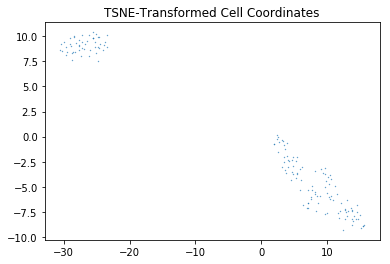

In [12]:
iftc = iris_forest.tsne()

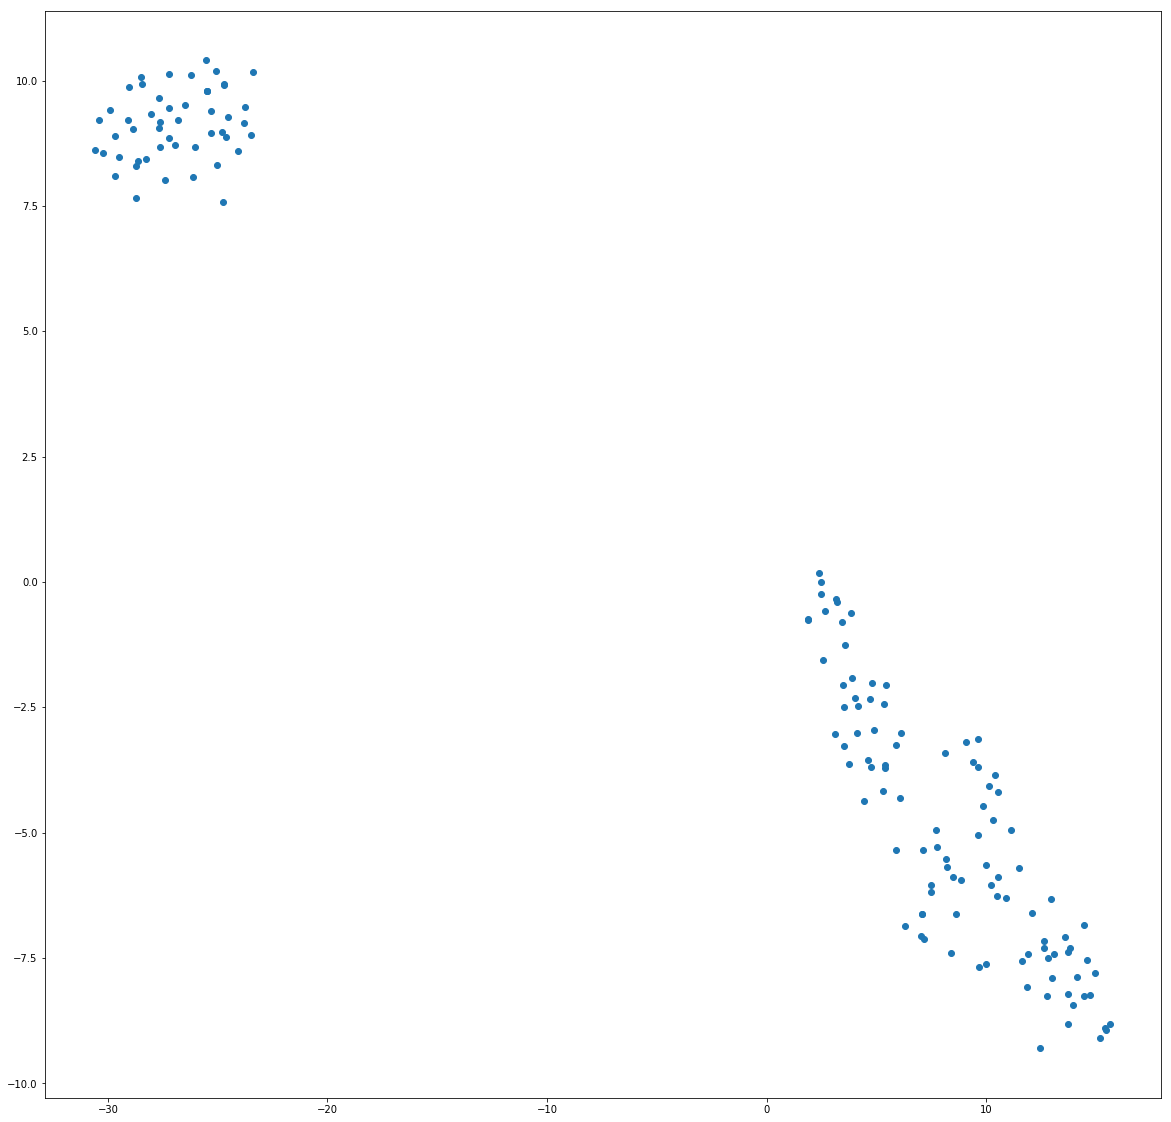

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(iftc[:,0],iftc[:,1])
plt.show()

In [14]:
braids = trbr.IHMM(iris_forest)

In [15]:
print(braids.hidden_states[0].sample_log_odds)
print(braids.hidden_states[1].sample_log_odds)
print(braids.hidden_states[2].sample_log_odds)
print(braids.hidden_states[3].sample_log_odds)
print(braids.hidden_states[4].sample_log_odds)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0

In [20]:
braids.sample_states()

Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   0.         174.30582561 159.38986147 216.74192063]
[0.00000000e+00 1.00000000e+00 5.01254432e+75 1.66777442e+69
 1.34840430e+94]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   0.         202.54725912 198.88921257 251.07878434]
[0.00000000e+000 1.00000000e+000 9.22904916e+087 2.37950997e+086
 1.10187051e+109]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   0.         207.21045165 176.33226394 241.04258489]
[0.00000000e+000 1.00000000e+000 9.78038039e+089 3.80302526e+076
 4.82463567e+104]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   0.         162.35207092 145.14580002 211.93694654]
[0.00000000e+00 1.00000000e+00 3.22558526e+70 1.08647570e+63
 1.10419657e+92]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   0.         157.28333138 169.07225015 218.96522417]
[0.00000000e+00 1.00000000e+00 2.02900404e+68 2.67390076e+73
 1.24562865e+95]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   0.         179.0361087  175

Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   0.         149.56079893 137.69309472 136.53486763]
[0.00000000e+00 1.00000000e+00 8.98317137e+64 6.30015500e+59
 1.97851614e+59]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  0.         28.26910412 16.17164087 15.06889501]
[0.00000000e+00 1.00000000e+00 1.89284881e+12 1.05500470e+07
 3.50217586e+06]
Sampling node state
[0. 0. 0. 0. 0.]
[        -inf   0.         160.9960626  139.38256031 127.94700769]
[0.00000000e+00 1.00000000e+00 8.31192461e+69 3.41253264e+60
 3.68705330e+55]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  0.         21.89657908 22.61633749 25.71534904]
[0.00000000e+00 1.00000000e+00 3.23268560e+09 6.63973234e+09
 1.47242841e+11]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  0.         65.08609509 50.05390121 52.34032334]
[0.00000000e+00 1.00000000e+00 1.84727668e+28 5.47183624e+21
 5.38410606e+22]
Sampling node state
[0. 0. 0. 0. 0.]
[       -inf  0.         39.13870828 38.99392859 68.07619035]
[0.000

/Users/boris/taylor/vision/rust_prototype/rusty_lumberjack/src/tree_braider.py:159: RuntimeWarning: invalid value encountered in true_divide
  new_log_odds = np.log2((left/total)/(right/total))


In [21]:
print(braids.hidden_states[0].sample_log_odds)
print(braids.hidden_states[1].sample_log_odds)
print(braids.hidden_states[2].sample_log_odds)
print(braids.hidden_states[3].sample_log_odds)
print(braids.hidden_states[4].sample_log_odds)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[  3.         -10.          -3.169925   -10.           2.
   3.5849625   -1.80735492

In [22]:
[n.hidden_state for n in braids.nodes]

[4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 2,
 4,
 3,
 4,
 2,
 2,
 4,
 4,
 3,
 2,
 2,
 4,
 3,
 4,
 2,
 4,
 2,
 4,
 3,
 4,
 3,
 4,
 2,
 4,
 2,
 2,
 3,
 4,
 2,
 2,
 3,
 4,
 4,
 2,
 3,
 4,
 2,
 2,
 2,
 4,
 2,
 3,
 2,
 4,
 2,
 2,
 3,
 4,
 2,
 4,
 2,
 4,
 4,
 2,
 2,
 4,
 3,
 4,
 2,
 4,
 4,
 4,
 2,
 3,
 4,
 4,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 2,
 3,
 4,
 2,
 4,
 4,
 4,
 3,
 2,
 2,
 4,
 2,
 4,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 3,
 4,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 3,
 2,
 4,
 2,
 4,
 2,
 4,
 2,
 2,
 3,
 4,
 2,
 4,
 4,
 2,
 2,
 4,
 2,
 4,
 2,
 3,
 4,
 2,
 2,
 4,
 2,
 4,
 3,
 2,
 2,
 2,
 2,
 4,
 3,
 4,
 3,


96


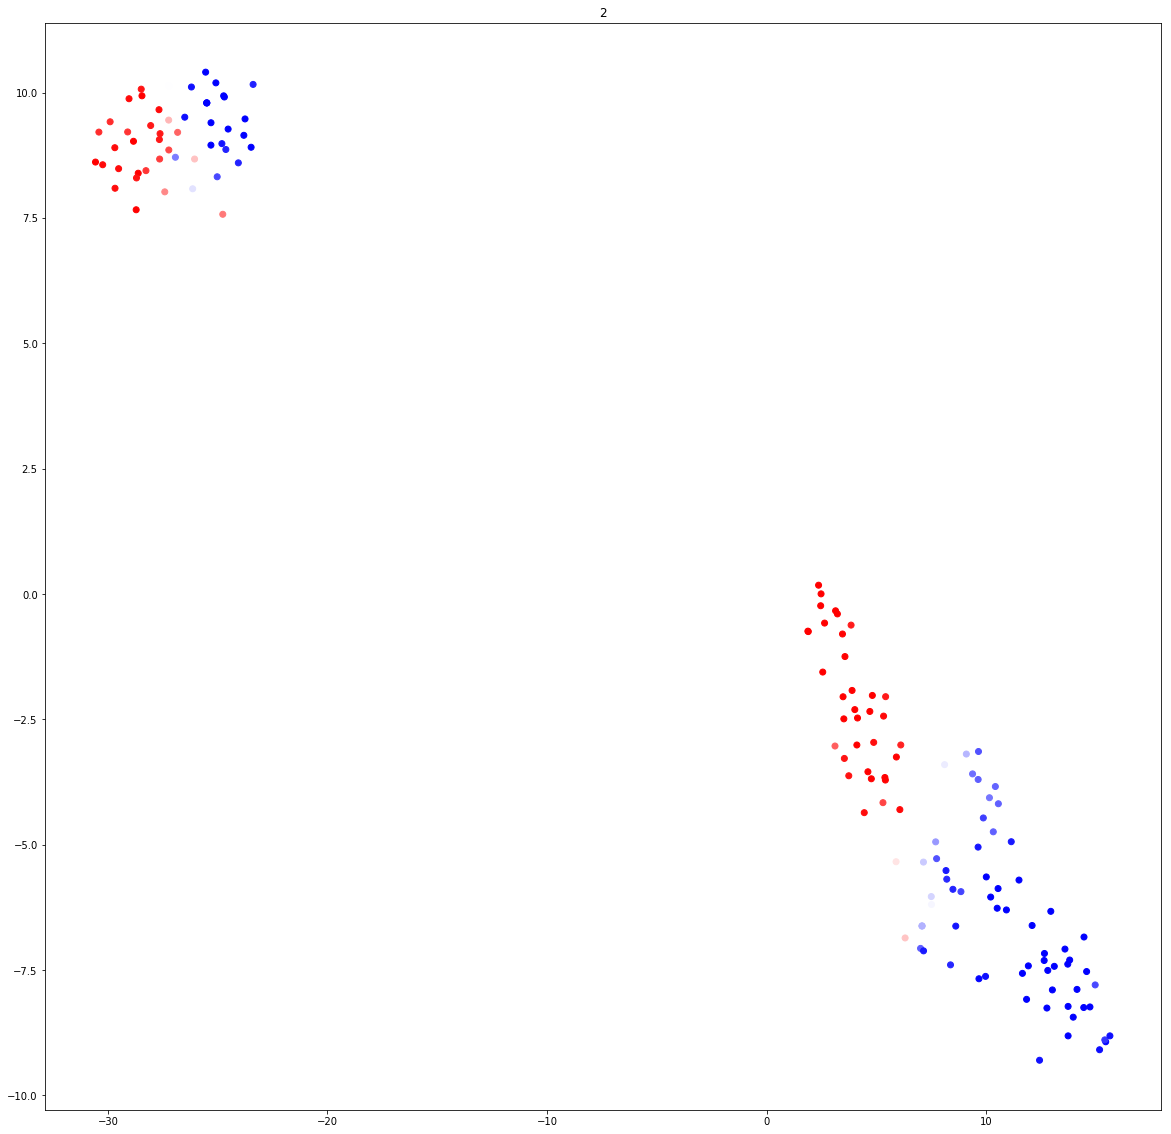

24


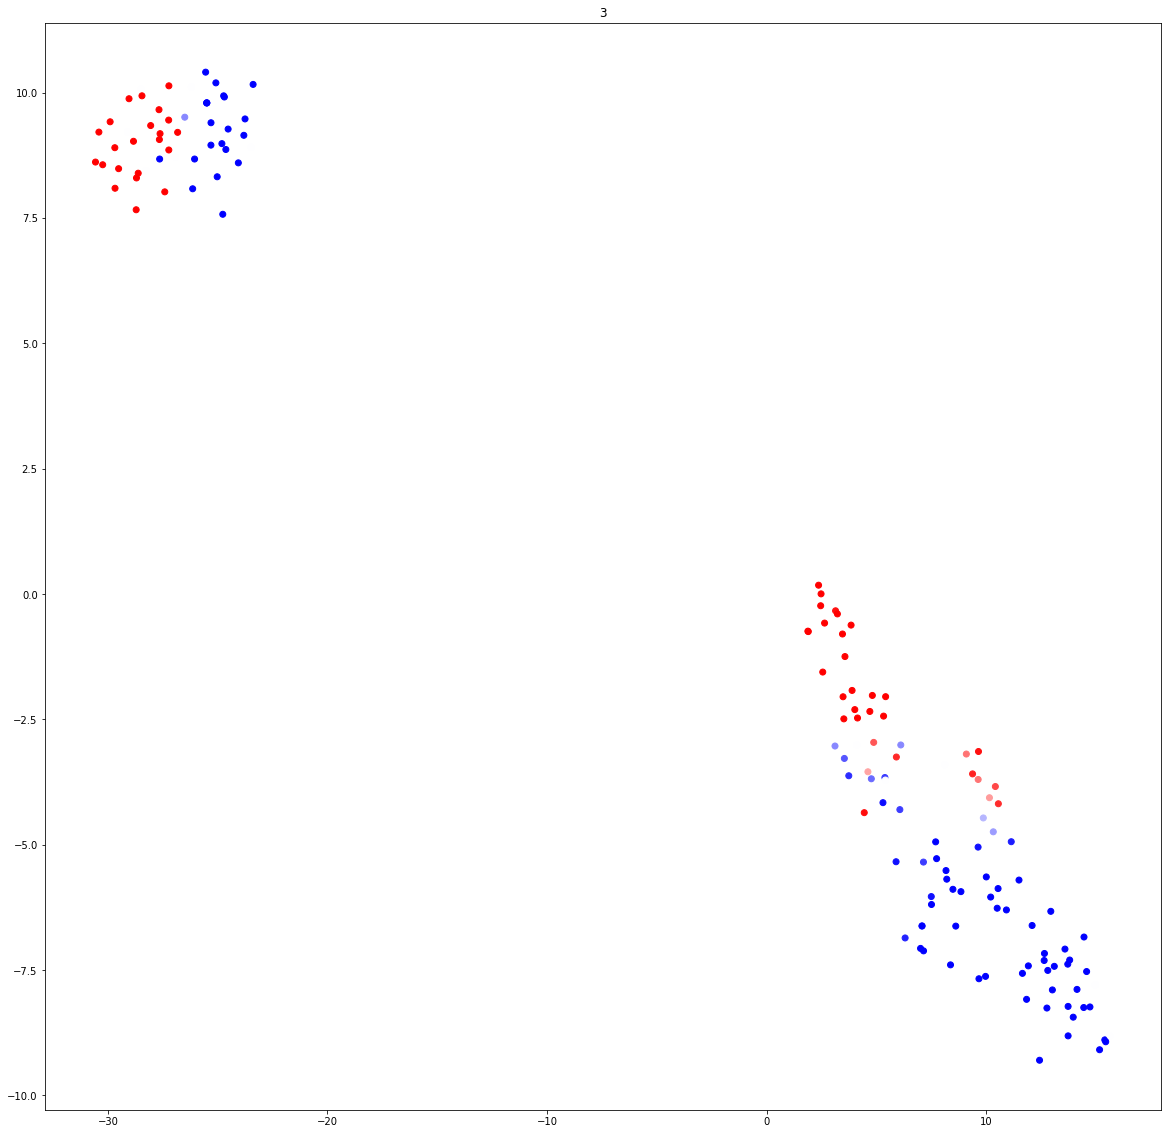

180


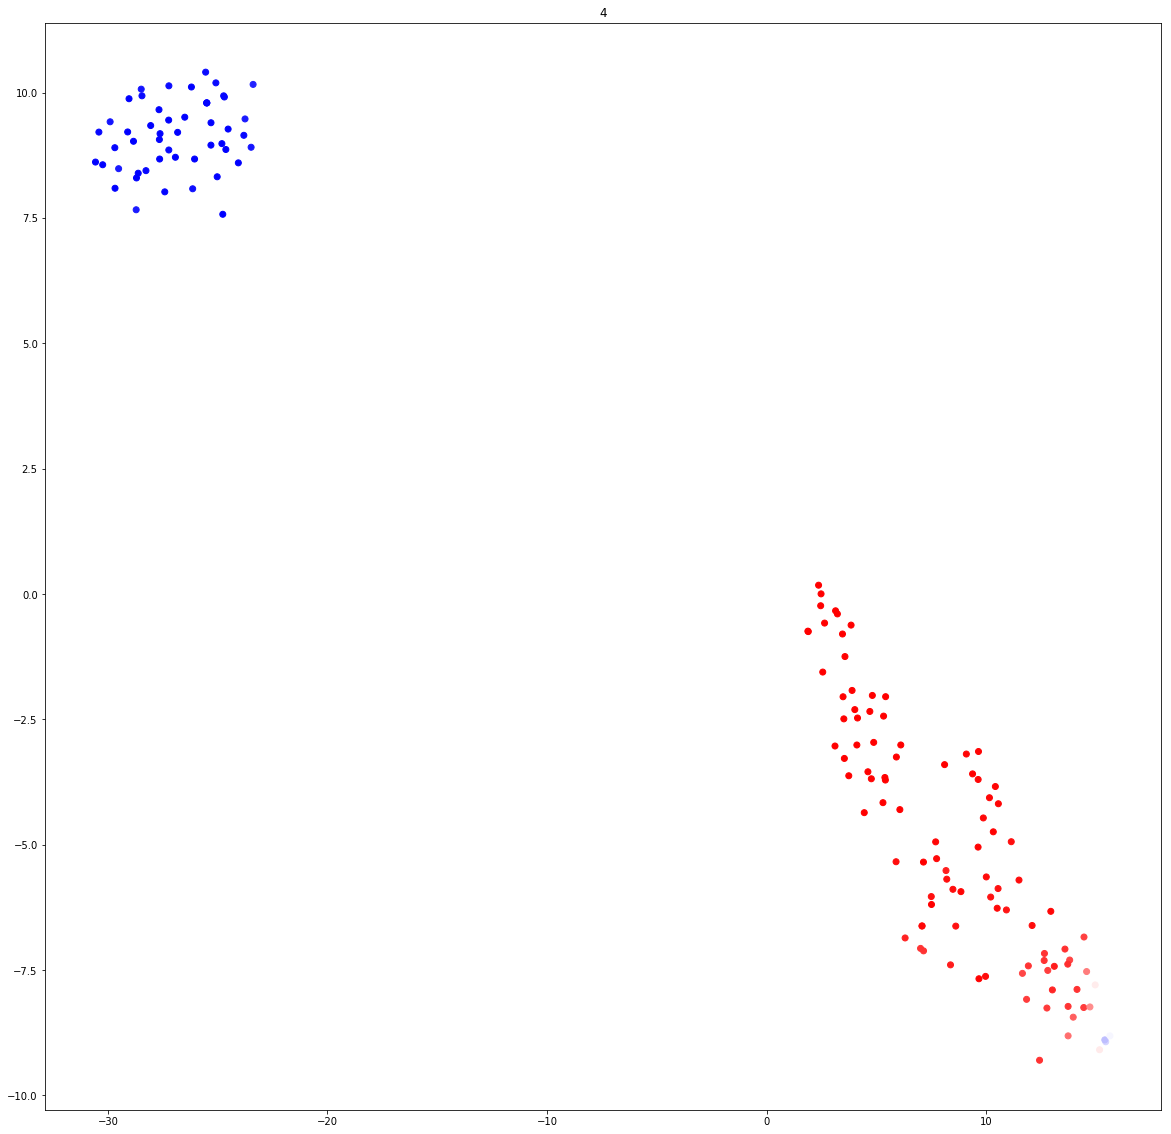

In [24]:
for hidden_state in braids.hidden_states[2:]:
    print(len(hidden_state.nodes))
    plt.figure(figsize=(20,20))
    plt.title(str(hidden_state.index))
    plt.scatter(iftc[:,0],iftc[:,1],c=hidden_state.lr_finite(),cmap='bwr')
    plt.show()